In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = keras.datasets.imdb

In [3]:
max_word = 10000

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=max_word)

In [5]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)

In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
model = keras.models.Sequential()

In [8]:
model.add(layers.Embedding(10000, 50, input_length = 300))

In [9]:
x_train.shape

(25000, 300)

现在数据变成了25000，300，50

In [10]:
# model.add(layers.Flatten())
model.add(layers.GlobalAveragePooling1D())

In [11]:
model.add(layers.Dense(128, activation="relu"))

In [12]:
model.add(layers.Dropout(0.5))

In [13]:
model.add(layers.Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           500000    
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 506,657
Trainable params: 506,657
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["acc"]
)

In [16]:
history = model.fit(x_train, y_train, epochs=15, batch_size = 256, validation_data=(x_test, y_test))

Epoch 1/15
98/98 [==============================] - 4s 28ms/step - loss: 0.6729 - acc: 0.6211 - val_loss: 0.6060 - val_acc: 0.7745
Epoch 2/15
98/98 [==============================] - 2s 25ms/step - loss: 0.4553 - acc: 0.8293 - val_loss: 0.3590 - val_acc: 0.8584
Epoch 3/15
98/98 [==============================] - 2s 25ms/step - loss: 0.2957 - acc: 0.8869 - val_loss: 0.3020 - val_acc: 0.8773
Epoch 4/15
98/98 [==============================] - 2s 25ms/step - loss: 0.2389 - acc: 0.9097 - val_loss: 0.2849 - val_acc: 0.8825
Epoch 5/15
98/98 [==============================] - 2s 25ms/step - loss: 0.2032 - acc: 0.9258 - val_loss: 0.2860 - val_acc: 0.8852
Epoch 6/15
98/98 [==============================] - 2s 25ms/step - loss: 0.1780 - acc: 0.9356 - val_loss: 0.2868 - val_acc: 0.8839
Epoch 7/15
98/98 [==============================] - 2s 25ms/step - loss: 0.1585 - acc: 0.9450 - val_loss: 0.2957 - val_acc: 0.8831
Epoch 8/15
98/98 [==============================] - 2s 25ms/step - loss: 0.1437 - a

In [17]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

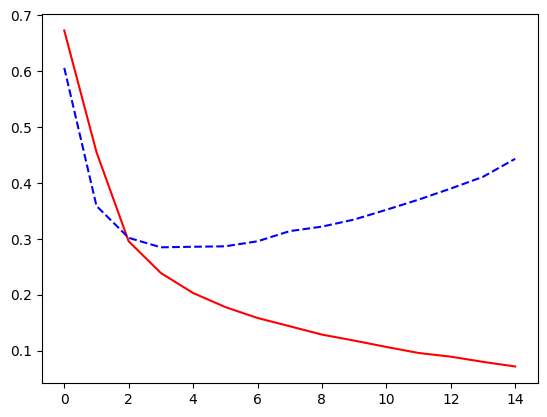

In [20]:
plt.plot(history.epoch, history.history["loss"], "r")
plt.plot(history.epoch, history.history["val_loss"], "b--")

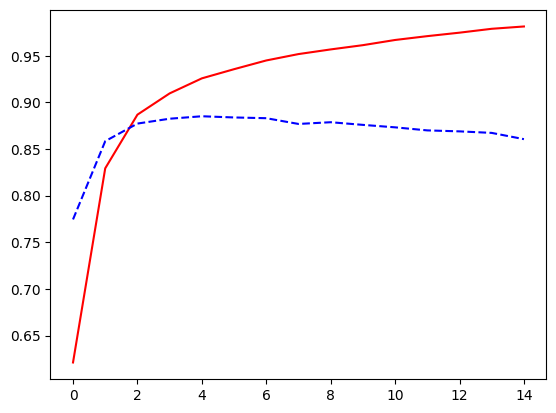

In [21]:
plt.plot(history.epoch, history.history["acc"], "r")
plt.plot(history.epoch, history.history["val_acc"], "b--")